# Decision Trees

In [502]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import  DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [503]:
pd.set_option('display.max_columns', None)
sp_data=pd.read_csv('data/dataset.csv')
sp_data.genre.value_counts()
sp_data = sp_data[sp_data['genre'].notnull()]
#sp_data = sp_data[(sp_data['genre']=='pop') |
#                  (sp_data['genre']=='rock')]
sp_data.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60,pop
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,spotify:track:62eoocmGk59EMfuRcLBvUL,0.662,0.272,0,-18.883,1,0.0313,0.3600,0.228000,0.0963,0.591,143.507,134360,4,47.82155,7,0,60,jazz
9,I Can Hear Music,The Beach Boys,spotify:track:1hcMfYTsRTC4hIKbfosxjz,0.511,0.603,2,-7.637,1,0.0280,0.0385,0.000002,0.1420,0.685,128.336,157293,4,43.36534,9,1,60,pop
11,Ride Away,Roy Orbison,spotify:track:1nxSCulSg5AtmExqgHPPC0,0.520,0.411,9,-12.411,1,0.0315,0.7860,0.001200,0.1460,0.350,120.290,207573,4,37.54527,9,1,60,pop
13,P.T. 109,Jimmy Dean,spotify:track:3vfNUZeVUiwWXwsEXjagqL,0.746,0.666,2,-10.408,1,0.1460,0.5430,0.000000,0.0488,0.840,94.024,192427,4,78.59848,5,1,60,country


In [504]:
le=LabelEncoder()
sp_data_encoded=sp_data[["danceability","energy","key","loudness","mode",
                                 "speechiness","instrumentalness","acousticness","liveness","valence","tempo",
                                 "duration_ms","chorus_hit","decade","genre"]]
sp_data_encoded['n_decade']=le.fit_transform(sp_data_encoded['decade'])
sp_data_encoded["n_genre"]=le.fit_transform(sp_data_encoded['genre'])
sp_data_encoded=sp_data_encoded.drop(['genre','decade'],axis=1)
sp_data_encoded.head(5)

<ipython-input-504-a963430cb19b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_data_encoded['n_decade']=le.fit_transform(sp_data_encoded['decade'])
<ipython-input-504-a963430cb19b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_data_encoded["n_genre"]=le.fit_transform(sp_data_encoded['genre'])


,danceability,energy,key,loudness,mode,speechiness,instrumentalness,acousticness,liveness,valence,tempo,duration_ms,chorus_hit,n_decade,n_genre
1,0.498,0.505,3,-12.475,1,0.0337,0.107000,0.0180,0.1760,0.797,101.801,213613,48.82510,2,6
6,0.662,0.272,0,-18.883,1,0.0313,0.228000,0.3600,0.0963,0.591,143.507,134360,47.82155,2,4
9,0.511,0.603,2,-7.637,1,0.0280,0.000002,0.0385,0.1420,0.685,128.336,157293,43.36534,2,6
11,0.520,0.411,9,-12.411,1,0.0315,0.001200,0.7860,0.1460,0.350,120.290,207573,37.54527,2,6
13,0.746,0.666,2,-10.408,1,0.1460,0.000000,0.5430,0.0488,0.840,94.024,192427,78.59848,2,1


In [505]:
trainX,testX,trainY,testY=train_test_split(
    sp_data_encoded.drop(['n_genre'],axis=1),
    sp_data_encoded['n_genre'])
trainX.head(5)

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,acousticness,liveness,valence,tempo,duration_ms,chorus_hit,n_decade
14613,0.436,0.125,5,-15.433,1,0.0664,0.000001,0.9570,0.1210,0.329,204.771,124227,37.88965,3
14635,0.485,0.442,8,-15.474,0,0.0328,0.785000,0.2630,0.1030,0.755,140.818,424625,26.55848,3
13444,0.421,0.736,2,-8.690,1,0.0374,0.043100,0.1320,0.0999,0.962,162.792,204667,24.66192,3
18901,0.827,0.596,0,-13.486,1,0.0559,0.026600,0.0744,0.0768,0.899,118.730,249440,17.77406,4
1077,0.446,0.262,0,-12.076,1,0.0629,0.000010,0.4800,0.1270,0.155,152.070,154733,43.15294,2


In [506]:
dt_entropy=DecisionTreeClassifier(criterion="entropy",max_depth=8)
dt_entropy.fit(trainX,trainY)
predicted=dt_entropy.predict(testX)
dt_entropy.feature_importances_

array([0.18192432, 0.04349864, 0.00360457, 0.01199608, 0.01133632,
       0.19870572, 0.09878021, 0.19655519, 0.00558134, 0.02855954,
       0.01384744, 0.04948344, 0.00391604, 0.15221114])

In [507]:
result_entropy=pd.DataFrame({"actual":testY,"predicted":predicted})
result_entropy

,actual,predicted
20584,6,6
35718,6,6
3936,7,4
28298,5,5
33159,6,7
...,...,...
8714,1,6
31033,1,1
32519,1,1
39233,1,6


In [508]:
predict_train=dt_entropy.predict(trainX)
print(accuracy_score(result_entropy['actual'],result_entropy['predicted']))
print(accuracy_score(trainY,predict_train))

0.5002954500689384
0.5597504924491136


In [509]:
result_entropy.predicted.value_counts()

conf_matrix=pd.crosstab(le.inverse_transform(result_entropy['actual']),le.inverse_transform(result_entropy['predicted']))
conf_matrix

col_0,blues,country,funk,hip-hop,jazz,metal,pop,rock,techno
row_0,,,,,,,,,
blues,9,0,4,0,26,1,78,22,0
country,0,205,1,5,17,1,250,52,0
funk,0,1,30,13,9,1,151,50,0
hip-hop,0,4,3,235,6,5,135,9,0
jazz,8,5,7,3,120,3,143,41,6
metal,0,1,1,4,1,143,15,73,1
pop,6,111,31,95,59,17,1180,332,3
rock,2,57,24,9,52,40,513,615,5
techno,0,0,1,2,1,2,12,7,3


<AxesSubplot:xlabel='col_0', ylabel='row_0'>

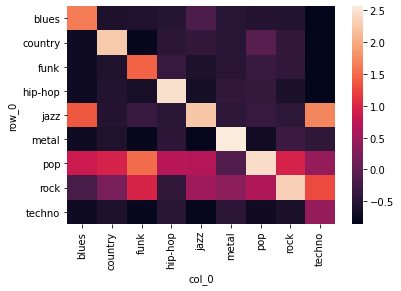

In [510]:
sns.heatmap((conf_matrix-conf_matrix.mean())/conf_matrix.std())